# Paper

#### Import Functions

In [1]:
%matplotlib inline

#import pyvttbl as pt
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.api as sm

import statsmodels.formula.api as smf

import numpy as np
import sklearn
import pandas as pd
#import preprocess2
#import prepare
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy import stats
import warnings
from scipy.stats.mstats import zscore
import matplotlib
#matplotlib.use('TkAgg')  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hac
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
import mne
import imageio
import datetime as dt
import os 


#### Loading the Data

In [2]:
df=pd.read_csv('./final_df_mb.csv', sep=',', na_values=['?']) 

## Participants (Demographics and Sample Characteristics)

In [3]:
df=df[df.vpn!=26] # hier ist irgendetwas schief gegangen - die Zeiten stimmen nicht!! 
df=df[df.vpn!=33] # hier ist irgendetwas schief gegangen - die Zeiten stimmen nicht!! 
df=df[df.vpn!=34] # extrem unruhig - und Ausreißer-Werte bei LEV
df=df[df.vpn!=37] # extrem unruhig
df=df[df.conversation!='base'].reset_index() #delete the trigger and base

In [4]:
df['participant_speaks']=(df.conversation=='joy_proband') | (df.conversation=='disgust_proband') | (df.conversation=='neutral_proband')#if conversation==
df=df[(df.participant_speaks==False)&(df.conversation!='intro')].reset_index(drop=True)

In [5]:
df['ZYG_z']=scipy.stats.zscore(df['ZYG'])
df['COR_z']=scipy.stats.zscore(df['COR'])
df['LEV_z']=scipy.stats.zscore(df['LEV'])

In [6]:
print ('number of particpants ' + str(len(df.groupby('vpn'))))
#print 'number of females ' + str(len(df[df.gender==1].groupby('vpn')))
print ('min age ' + str(np.min(df.groupby('vpn').mean().years)))
print ('max age ' + str(np.max(df.groupby('vpn').mean().years)))
print ('mean age ' + str(np.mean(df.groupby('vpn').mean().years)))
print ('std age ' + str(np.std(df.groupby('vpn').mean().years)))
print ('AQ above cut-off of 17: ' + str(np.sum(df.groupby('vpn').mean().AQsum>17)))
print ('mean AQ' + str(np.mean(df.groupby('vpn').mean().AQsum)))
print ('mean AQ' + str(np.std(df.groupby('vpn').mean().AQsum)))
print ('mind. high-school education: ' + str(np.sum(df.groupby('vpn').mean().education>5)))
print ('WST: ' + str(np.sum(df.groupby('vpn').mean().WST<20)))

number of particpants 35
min age 18.0
max age 34.0
mean age 25.97142857142857
std age 4.7658650198841235
AQ above cut-off of 17: 5
mean AQ9.628571428571428
mean AQ6.047836516524917
mind. high-school education: 26
WST: 0


## EMG Activity over Timecourse of Conversation

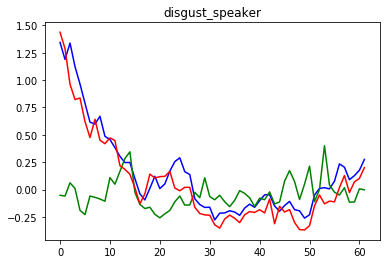

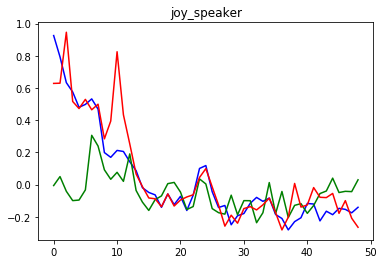

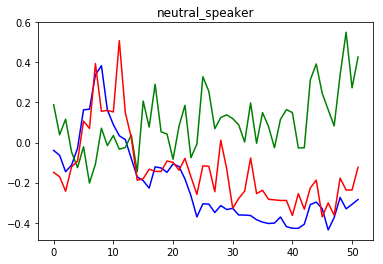

In [7]:
colors=['blue', 'green','red']
#final=df[(df.vpn==34)]# | (df.vpn!=33)]
final=df
muscles=['ZYG_z', 'COR_z', 'LEV_z']

for conv in np.unique(final.conversation):
    i=0
    for m in muscles:
        plt.plot(np.array(final[(final['conversation']==conv)].groupby(['counter']).mean().reset_index()['counter']), 
                 np.array(final[(final['conversation']==conv)].groupby(['counter']).mean().reset_index(drop=True)[m]),
                 color=colors[i])
        plt.title(str(conv))
        #plt.ylim(0, 200)
        i=i+1
    plt.show()

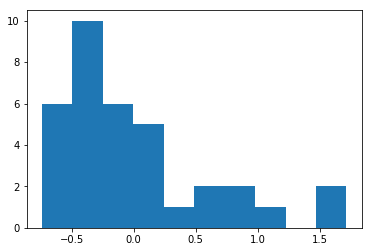

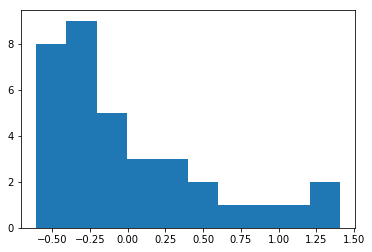

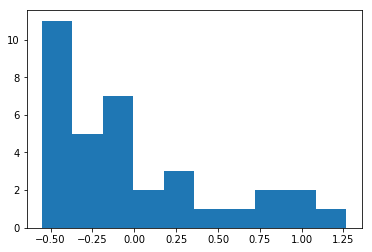

In [8]:
plt.hist(df.groupby('vpn').mean()['ZYG_z'])
plt.show()
plt.hist(df.groupby('vpn').mean()['COR_z'])
plt.show()
plt.hist(df.groupby('vpn').mean()['LEV_z'])
plt.show()

In [9]:
df_figure=df.rename(columns={'ZYG_z': 'ZYG (zstd.)', 'COR_z': 'COR (zstd.)', 'LEV_z': 'LEV (zstd.)'})
di = {"neutral_speaker":"1.Table Setting",
      "joy_speaker":"2.Liked Food",
      "disgust_speaker":"3.Disliked Food"}
df_figure=df_figure.replace({"conversation": di})

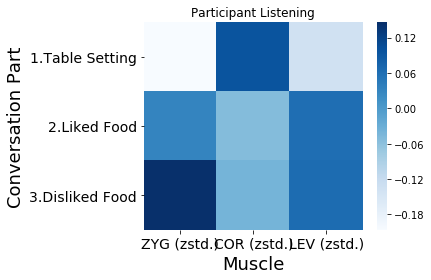

In [10]:
g=sns.heatmap(df_figure[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)']], 
              cmap='Blues')##,  vmin=-0.3, vmax=0.4)
#cmap='RdBu_r',

#print (df[df.participant_speaks==True].groupby('conversation').mean()[['ZYG_z', 'COR_z']])

#plt.set
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.xlabel('Muscle', fontsize=18) 
plt.ylabel('Conversation Part', fontsize=18)
plt.title('Participant Listening')
plt.savefig('Muscles_Listening_' +'.pdf', format='pdf', bbox_inches = "tight")
plt.savefig('Muscles_Listening_' +'.png', format='png', bbox_inches = "tight")
plt.tight_layout()
plt.show()   
plt.close()

In [93]:

print (df_figure[(df_figure.participant_speaks==False) &(df_figure.conversation!='intro')].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)']])
print (df_figure[(df_figure.participant_speaks==False) &(df_figure.conversation!='intro')][['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)', 'conversation']].groupby('conversation').std())


                 ZYG (zstd.)  COR (zstd.)  LEV (zstd.)
conversation                                          
1.Table Setting    -0.206101     0.096470    -0.135266
2.Liked Food        0.031855    -0.051534     0.061853
3.Disliked Food     0.145898    -0.039424     0.063481
                 ZYG (zstd.)  COR (zstd.)  LEV (zstd.)
conversation                                          
1.Table Setting     0.683976     1.211211     0.766442
2.Liked Food        0.940357     0.831002     1.041062
3.Disliked Food     1.215215     0.920003     1.120437


In [111]:
df1=df[df.conversation=='neutral_speaker'].groupby('vpn').mean()
df2=df[df.conversation=='joy_speaker'].groupby('vpn').mean()
df3=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()

In [112]:
import mystats
mystats.two_dep_sample_tests(df1, df2, 'ZYG_z')
mystats.two_dep_sample_tests(df1, df3, 'ZYG_z')

mystats.two_dep_sample_tests(df1, df2, 'COR_z')
mystats.two_dep_sample_tests(df1, df3, 'COR_z')


not normally distributed: p1=0.00012410296767484397 p2=7.641858246643096e-05
WilcoxonResult(statistic=111.0, pvalue=0.0008337350354222429)
Dataframe one
median:-0.2851075164090778
Dataframe two
median:-0.1963658265511294
not normally distributed: p1=0.00012410296767484397 p2=2.7571777536650188e-05
WilcoxonResult(statistic=73.0, pvalue=7.378071555103024e-05)
Dataframe one
median:-0.2851075164090778
Dataframe two
median:-0.1561968532254668
not normally distributed: p1=4.522963354247622e-05 p2=0.00011714184074662626
WilcoxonResult(statistic=253.0, pvalue=0.30986427603817557)
Dataframe one
median:-0.20668176682570408
Dataframe two
median:-0.2368028501600502
not normally distributed: p1=4.522963354247622e-05 p2=3.1068777843756834e-06
WilcoxonResult(statistic=310.0, pvalue=0.9347296420266101)
Dataframe one
median:-0.20668176682570408
Dataframe two
median:-0.20043478300692677


In [108]:

mystats.two_dep_sample_tests(df1, df2, 'LEV_z')
mystats.two_dep_sample_tests(df1, df3, 'LEV_z')
0.008

not normally distributed: p1=0.013285264372825623 p2=1.0510648280614987e-05
WilcoxonResult(statistic=168.0, pvalue=0.016051870951814883)
Dataframe one
median:-0.2350430539626045
Dataframe two
median:-0.2683269748971032
not normally distributed: p1=0.013285264372825623 p2=0.009793976321816444
WilcoxonResult(statistic=147.0, pvalue=0.005928752580349287)
Dataframe one
median:-0.2350430539626045
Dataframe two
median:-0.12466629162977401


0.008

## Correlation of EMG and Questionnaire Values

In [87]:
emotion=3
muscle=3

neutral_cor=df[df.conversation=='neutral_speaker'].groupby('vpn').mean()['COR_z']
neutral_zyg=df[df.conversation=='neutral_speaker'].groupby('vpn').mean()['ZYG_z']
neutral_lev=df[df.conversation=='neutral_speaker'].groupby('vpn').mean()['LEV_z']
         
pos_cor=df[df.conversation=='joy_speaker'].groupby('vpn').mean()['COR_z']   
pos_zyg=df[df.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG_z']
pos_lev=df[df.conversation=='joy_speaker'].groupby('vpn').mean()['LEV_z']
         
neg_cor=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['COR_z']        
neg_zyg=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['ZYG_z']
neg_lev=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['LEV_z']

print ('Effect of Muscle and Emotion')
data=np.array(pd.concat([neutral_cor, neutral_zyg, neutral_lev, 
                         pos_cor, pos_zyg, pos_lev, 
                         neg_cor, neg_zyg, neg_lev], axis=1))
factorlevels=[emotion, muscle]

print (mne.stats.f_mway_rm(data, factorlevels, effects='A*B'))

Effect of Muscle and Emotion
[array([2.61256730e+00, 4.10140167e-03, 6.78500651e+00]), array([8.06969199e-02, 9.95907244e-01, 5.21046167e-05])]


In [79]:
zyg=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['vpn']).mean()[['ZYG_z', 'AQsum']].reset_index()
zyg['muscle']='ZYG'
zyg['activity']=zyg.ZYG_z
cor=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['vpn']).mean()[['COR_z', 'AQsum']].reset_index()
cor['muscle']='COR'
cor['activity']=cor.COR_z
data=pd.concat([zyg, cor], sort=True)

model = sm.MixedLM.from_formula("activity ~ AQsum*muscle ", data[data.AQsum>0], groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   activity
No. Observations:     70        Method:               REML    
No. Groups:           35        Scale:                0.3123  
Min. group size:      2         Likelihood:           -65.9592
Max. group size:      2         Converged:            Yes     
Mean group size:      2.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.269    0.178 -1.515 0.130 -0.617  0.079
muscle[T.ZYG]        0.470    0.251  1.873 0.061 -0.022  0.963
AQsum                0.028    0.016  1.787 0.074 -0.003  0.059
AQsum:muscle[T.ZYG] -0.049    0.022 -2.213 0.027 -0.092 -0.006
Group Var            0.000    0.114                           



C:\Users\User\Anaconda2\envs\py3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [83]:
zyg=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['vpn']).mean()[['ZYG_z', 'AQsum']].reset_index()
zyg['muscle']='ZYG'
zyg['activity']=zyg.ZYG_z
cor=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['vpn']).mean()[['COR_z', 'AQsum']].reset_index()
cor['muscle']='COR'
cor['activity']=cor.COR_z

lev=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['vpn']).mean()[['LEV_z', 'AQsum']].reset_index()
lev['muscle']='LEV'
lev['activity']=lev.LEV_z
data=pd.concat([zyg, cor, lev], sort=True)

model = sm.MixedLM.from_formula("activity ~ AQsum*muscle ", data[data.AQsum>0], groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   activity
No. Observations:     105       Method:               REML    
No. Groups:           35        Scale:                0.2476  
Min. group size:      3         Likelihood:           -94.3532
Max. group size:      3         Converged:            Yes     
Mean group size:      3.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.269    0.171 -1.571 0.116 -0.605  0.067
muscle[T.LEV]        0.420    0.224  1.880 0.060 -0.018  0.859
muscle[T.ZYG]        0.470    0.224  2.103 0.035  0.032  0.909
AQsum                0.028    0.015  1.853 0.064 -0.002  0.057
AQsum:muscle[T.LEV] -0.044    0.020 -2.220 0.026 -0.082 -0.005
AQsum:muscle[T.ZYG] -0.049    0.020 -2.485 0.013 -0.087 -0.010
Group

In [85]:
data=df[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby(['conversation', 'vpn']).mean().reset_index()

model = sm.MixedLM.from_formula("ZYG_z ~ AQsum", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


model = sm.MixedLM.from_formula("COR_z ~ AQsum", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


model = sm.MixedLM.from_formula("LEV_z ~ AQsum", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ZYG_z   
No. Observations: 105     Method:             REML    
No. Groups:       35      Scale:              0.1590  
Min. group size:  3       Likelihood:         -88.6453
Max. group size:  3       Converged:          Yes     
Mean group size:  3.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.188    0.186  1.012 0.312 -0.176  0.552
AQsum       -0.021    0.016 -1.259 0.208 -0.053  0.011
Group Var    0.288    0.256                           

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: COR_z   
No. Observations: 105     Method:             REML    
No. Groups:       35      Scale:              0.1508  
Min. group size:  3       Likelihood:         -83.0211
Max. group size:  3       C

## Correlation of Food Preferences and EMG actvity

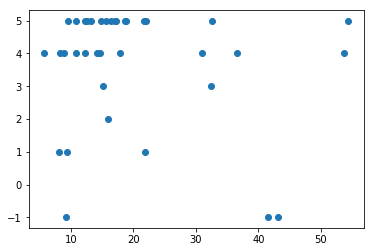

SpearmanrResult(correlation=0.05985180025806496, pvalue=0.7287804559396529)


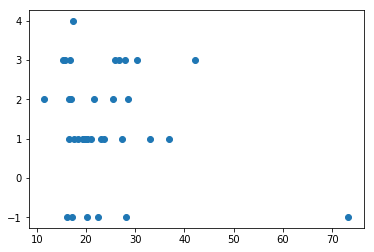

SpearmanrResult(correlation=0.06523149549985807, pvalue=0.7054460589324052)


In [21]:
plt.scatter(df[df.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['pizza'])
plt.show()

print (scipy.stats.spearmanr(final[final.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['pizza']))

plt.scatter(df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['LEV'],
            df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['hering'])
plt.show()

print (scipy.stats.spearmanr(df[df.conversation=='joy_speaker'].groupby('vpn').mean()['LEV'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['hering']))
plt.show()